In [3]:
%pip install -q -U kaggle_environments

Note: you may need to restart the kernel to use updated packages.


In [308]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate, env

# List of strategies (agents)

0 - rock
1 - paper
2 - scissors

In [259]:
%%writefile rock_agent.py
#throws only rock
def rock_agent(observation, configuration):
    return 0

Overwriting rock_agent.py


In [260]:
%%writefile paper_agent.py
#throws only paper
def paper_agent(observation, configuration):
    return 1

Overwriting paper_agent.py


In [296]:
%%writefile scissors_agent.py
#throws only scissors
def scissors_agent(observation, configuration):
    return 2

Overwriting scissors_agent.py


In [262]:
%%writefile random_agent.py
#throws random signs (R/P/S)
import random

def random_agent():
    return random.randrange(0, 3)

Overwriting random_agent.py


In [263]:
%%writefile not_rock_agent.py
#throws random signs excluding rock
import random

def not_rock_agent():
    return random.randrange(1, 3)

Overwriting not_rock_agent.py


In [264]:
%%writefile not_scissors_agent.py
#throws random signs excluding scissors
import random

def not_scissors_agent():
    return random.randrange(0, 2)

Overwriting not_scissors_agent.py


In [251]:
%%writefile not_paper_agent.py
#throws random signs excluding paper
import random

def not_paper_agent():
    return random.randrange(0, 3,2)

Writing not_paper_agent.py


In [252]:
%%writefile copy_opponent_agent.py
#copies last move of the opponent
import random
def copy_opponent_agent(observation, configuration):
    #in case we have information about opponent last move
    if observation.step > 0:
        return observation.lastOpponentAction
    #initial step
    else:
        return random.randrange(0, configuration.signs)

Overwriting copy_opponent_agent.py


In [253]:
%%writefile negate_copy_opponent_agent.py
#throws any move at random except for the last move of the opponent
import random
def negate_copy_opponent_agent(observation, configuration):
    #in case we have information about opponent last move
    if observation.step > 0:
        result = random.randrange(0,3)
        while result == observation.lastOpponentAction:
            result = random.randrange(0,3)
        return result
    #initial step
    else:
        return random.randrange(0, configuration.signs)

Overwriting negate_copy_opponent_agent.py


In [254]:
%%writefile cycle_agent.py
#cycles rock-paper-scissors
counter = 0

def cycle_agent(observation, configuration):
    #shift steps by one
    global counter
    step = observation.step

    if step == counter:
        return 0
    if step == counter + 1:
        return 1
    elif step == counter + 2:
        counter = step + 1
        return 2

Overwriting cycle_agent.py


In [255]:
%%writefile copy_2_last_moves_agent.py
#randomly selects a figure from two of his opponents last throws
import random
saved_obs = {'last':None,'before_last':None }

def copy_2_last_moves(observation, configuration):
    global saved_obs
    
    if observation.step == 1:
        saved_obs['before_last'] = observation.lastOpponentAction
        return random.randrange(0, configuration.signs)

    elif observation.step > 1:
        if observation.step % 2 == 0:
            saved_obs['last'] = observation.lastOpponentAction
        else:
            saved_obs['before_last'] = observation.lastOpponentAction
        return random.choice(list(saved_obs.values()))
    
    #initial step
    else:
        return random.randrange(0, configuration.signs)

Overwriting copy_2_last_moves_agent.py


In [267]:
%%writefile predominantly_rock_agent.py
#throws predominantly rock - 6/8 times (1/8 times either paper or scissors)
import random

def predominantly_rock_agent():
    choice_list = [0,0,0,0,0,0,1,2]
    return random.choice(choice_list)

Writing predominantly_rock_agent.py


In [266]:
%%writefile predominantly_paper_agent.py
#throws predominantly paper - 6/8 times (1/8 times either rock or scissors)
import random

def predominantly_paper_agent():
    choice_list = [0,1,1,1,1,1,1,2]
    return random.choice(choice_list)

Writing predominantly_paper_agent.py


In [265]:
%%writefile predominantly_scissors_agent.py
#throws predominantly scissors - 6/8 times (1/8 times either rock or paper)
import random

def predominantly_scissors_agent():
    choice_list = [0,1,2,2,2,2,2,2]
    return random.choice(choice_list)

Writing predominantly_scissors_agent.py


In [272]:
#list with agents name
agents_list=['copy_2_last_moves_agent.py', 'copy_opponent_agent.py', 'cycle_agent.py', 'negate_copy_opponent_agent.py', 'not_paper_agent.py', 'not_rock_agent.py', 'not_scissors_agent.py', 'paper_agent.py', 'predominantly_paper_agent.py', 'predominantly_rock_agent.py', 'predominantly_scissors_agent.py', 'random_agent.py', 'rock_agent.py', 'scissors_agent.py']

# Competition and results

In [309]:
#competing strategies against each other
result_matrix = []
result_vector = []

for agent_l in agents_list:
    for agent_r in agents_list:
        result_vector.append(
            evaluate(
                    "rps", #environment to use - no need to change
                    [agent_l, agent_r], #agents to evaluate
                    configuration={"episodeSteps": 50}, #number of episodes 
                    )[0][0]
            )
    result_matrix.append(result_vector)
    result_vector=[]

df = pd.DataFrame(result_matrix)
df.columns = agents_list
df.index = agents_list

df.head(14)

,copy_2_last_moves_agent.py,copy_opponent_agent.py,cycle_agent.py,negate_copy_opponent_agent.py,not_paper_agent.py,not_rock_agent.py,not_scissors_agent.py,paper_agent.py,predominantly_paper_agent.py,predominantly_rock_agent.py,predominantly_scissors_agent.py,random_agent.py,rock_agent.py,scissors_agent.py
copy_2_last_moves_agent.py,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
copy_opponent_agent.py,0,0.0,-48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
cycle_agent.py,0,48.0,0.0,-20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
negate_copy_opponent_agent.py,0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
not_paper_agent.py,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-24.0,24.0
not_rock_agent.py,0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0,0.0,-28.0
not_scissors_agent.py,0,0.0,0.0,0.0,0.0,0.0,0.0,-25.0,0.0,0.0,0.0,0,0.0,0.0
paper_agent.py,0,0.0,0.0,0.0,0.0,-24.0,27.0,0.0,0.0,24.0,-37.0,0,49.0,-49.0
predominantly_paper_agent.py,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,27.0,-30.0
predominantly_rock_agent.py,0,0.0,0.0,0.0,0.0,0.0,-21.0,-24.0,0.0,0.0,24.0,0,0.0,36.0


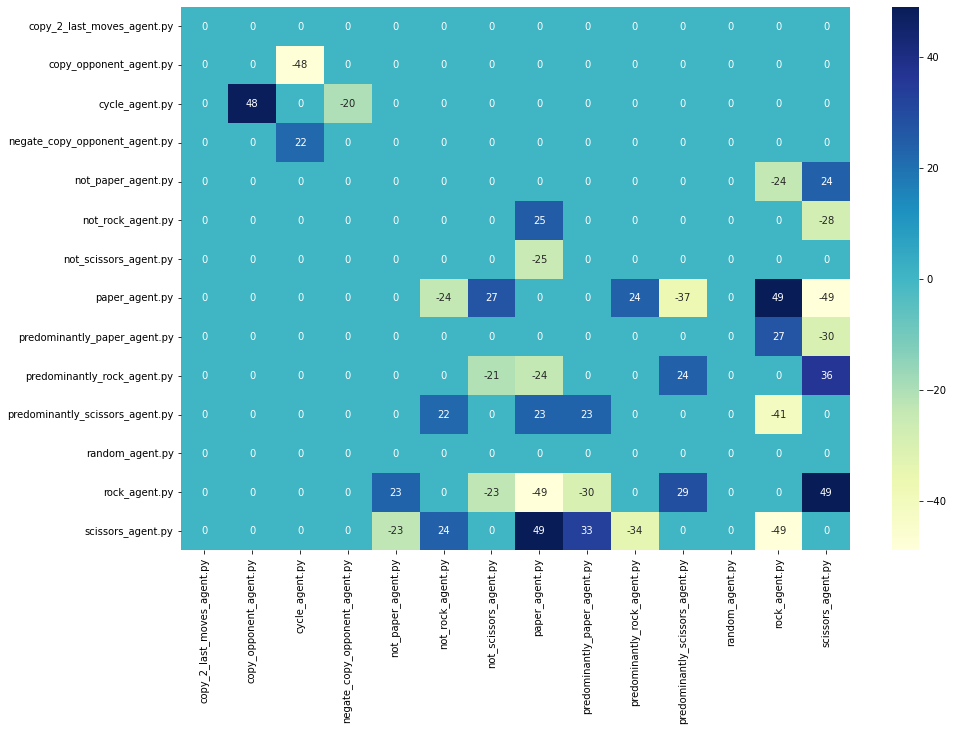

In [310]:
#plotting the results heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df,cmap='YlGnBu',annot=True)

plt.show()

In [312]:
df.sum(axis=1).sort_values(ascending=False)

cycle_agent.py                     28.0
predominantly_scissors_agent.py    27.0
negate_copy_opponent_agent.py      22.0
predominantly_rock_agent.py        15.0
copy_2_last_moves_agent.py          0.0
not_paper_agent.py                  0.0
random_agent.py                     0.0
scissors_agent.py                   0.0
rock_agent.py                      -1.0
not_rock_agent.py                  -3.0
predominantly_paper_agent.py       -3.0
paper_agent.py                    -10.0
not_scissors_agent.py             -25.0
copy_opponent_agent.py            -48.0
dtype: float64

In [313]:
#for this set of strategies the best is the "cycle_agent"

# Bellow are service cells

In [282]:
evaluate(
    "rps", #environment to use - no need to change
    ["paper", "rock"], #agents to evaluate
    configuration={"episodeSteps": 30}, #number of episodes 
    debug=False
)[0][0]

29.0

In [269]:
env = make(
    "rps",
    configuration={
        "episodeSteps": 20
    }
)

env.run(
    ["cycle_agent.py", "copy_2_last_moves_agent.py"]
)
env.render(mode="ipython", width=500, height=400)

In [271]:
from os import listdir
from os.path import isfile, join
mypath='C:\\Python\\Jupyter_VSC\\MIPT_DS\\1 semester\\Python Basics\\HW_fucntions'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['2022_09_week_HW.ipynb', 'copy_2_last_moves_agent.py', 'copy_opponent_agent.py', 'cycle_agent.py', 'negate_copy_opponent_agent.py', 'not_paper_agent.py', 'not_rock_agent.py', 'not_scissors_agent.py', 'paper_agent.py', 'predominantly_paper_agent.py', 'predominantly_rock_agent.py', 'predominantly_scissors_agent.py', 'random_agent.py', 'rock_agent.py', 'scissors_agent.py']
